In [1]:
import networkx
import pylab
import numpy as np
from sys import maxsize

In [37]:
class Graph:
    def __init__(self, with_default=0, with_arrow=False):
        self.with_arrow = with_arrow # 生成图是有向或者无向 fasle为无向，true是有向
        self.graph = self._generate_default_graph() if with_default == 1 else self.graph_input()
        self.adj_dict = self.__generate_adj_dict() # 生成邻接表
        self.node_weight = {}  # 节点权重
        
    # 生成默认赋权图
    def _generate_default_graph(self):
        graph = networkx.Graph()
        if self.with_arrow:
            graph = networkx.DiGraph()
        graph.add_edges_from([
            ('v1', 'v2', {'weight': 2}), ('v1', 'v4', {'weight': 1}),
            ('v2', 'v4', {'weight': 3}), ('v2', 'v5', {'weight': 10}),
            ('v3', 'v1', {'weight': 4}), ('v3', 'v6', {'weight': 5}),
            ('v4', 'v3', {'weight': 2}), ('v4', 'v5', {'weight': 2}),
            ('v4', 'v6', {'weight': 8}), ('v4', 'v7', {'weight': 4}),
            ('v5', 'v7', {'weight': 6}), ('v7', 'v6', {'weight': 1}),
        ])
        return graph
    
    # 读取文件生成图
    def __generate_graph

    # 可视化有权图
    def graph_plot(self):
        graph = self.graph
        edge_labels = dict([((u, v,), d['weight'])
                            for u, v, d in graph.edges(data=True)])
        pos = networkx.spring_layout(graph)
        networkx.draw_networkx_edges(graph, pos, arrows=True)
        networkx.draw_networkx_labels(graph, pos)
        networkx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)
        networkx.draw(graph, pos, node_size=1500, node_color=None, alpha=0.8, arrows=True)
        pylab.show()

    # 输入图
    def graph_input(self):
        graph = networkx.Graph()
        if self.with_arrow:
            graph = networkx.DiGraph()
        while True:
            input_edge = input("请输入两个节点的名称和这条边的权值，以逗号r','分割(如'v1,v2,0.8'),结束请输入'-1'：")
            param_edge = input_edge.split(',')
            if len(param_edge) < 3:
                break
            graph.add_edges_from([(param_edge[0], param_edge[1], {'weight': float(param_edge[2])})])
        return graph

    # 由有向图产生邻接表（用dict来表示）
    def __generate_adj_dict(self):
        res_dic = {}
        for key, val in dict(self.graph.adj).items():
            res_dic[key] = dict(val)
        return res_dic

In [39]:
class Djkstra:
    def __init__(self, graph, start_point_name):
        # graph图对象
        self.graph = graph
        # 邻接表
        self.adj_dict = self.__generate_adj_dict()
        # 固定节点名与对应的索引
        self.node_names = list(self.graph.node)
        self.node_names.sort()
        # 记录节点是否已经访问的列表(与self.nodes_name中一一对应)
        self.if_visited_list = [False for _ in range(len(self.node_names))]
        # 记录从起始点到各节点的最短距离的列表
        self.shortest_distance_list = [maxsize if self.node_names[index] != start_point_name else 0 
                                       for index in range(len(self.node_names))]
        # 记录对于所有节点而言，最短路径中连接当前节点的上级节点索引
        self.best_path_pre_node_list = [-1 for _ in range(len(self.node_names))]
        # 出发点索引
        self.start_point_index = self.node_names.index(start_point_name)
        # 维护的一个过程列表，存放if_visited_list中对应值为 false 并
        # 且distance_visited_list不为无穷大的备选访问节点
        self.node_container = []
        # 运行主程
        self.djkstra_engine()
    
    # 根据节点名称转换为节点索引
    def __node_transfer_index(self, node_name):
        return self.node_names.index(node_name)
    
    # 根据节点索引转换成节点名称
    def __index_transfer_node(self, node_index):
        return self.node_names[node_index]
    
    # 可视化图结构
    def graph_plot(self):
        graph = self.graph
        edge_labels = dict([((u,v,),d['weight'])
                 for u,v,d in graph.edges(data=True)])
        pos = networkx.spring_layout(graph)
        networkx.draw_networkx_edges(graph, pos, arrows=True)
        networkx.draw_networkx_labels(graph,pos)
        networkx.draw_networkx_edge_labels(graph,pos,edge_labels=edge_labels)
        networkx.draw(graph,pos,node_size=1500,node_color=None,alpha=0.8,arrows=True)
        pylab.show()
        
    # 由有向图产生邻接表（用dict来表示）
    def __generate_adj_dict(self):
        res_dic = {}
        for key,val in dict(self.graph.adj).items():
            res_dic[key] = dict(val)
        return res_dic
    
    # 查找self.node_container中的节点（要求该节点在shortest_distance_list中的对应值最小）
    # 然后从self.node_container中弹出该节点的ID
    def search_and_pop_min_dv(self):
        # node_container中各节点对应的dv值（从出发点到各节点的最短路径长度）
        dv_list = [ self.shortest_distance_list[node_index] for node_index in self.node_container]
        # dv值最小的节点index
        res_node_index = self.node_container[np.argmin(dv_list)]
        # 从node_container中弹出dv值最小的节点
        self.node_container.remove(res_node_index)
        return res_node_index
       
    # 将输入节点设为已经访问
    def __update_if_visited_list(self, node_index):
        self.if_visited_list[node_index] = True
        
    # 运行主程
    def djkstra_engine(self):
        self.node_container.append(self.start_point_index)
        while len(self.node_container) != 0:
            node_base_index = self.search_and_pop_min_dv()
            # 将这个节点设为已经访问
            self.__update_if_visited_list(node_base_index)
            
            node_base_name = self.__index_transfer_node(node_base_index)
            # 与这个节点node_base相邻的并且
            # 在is_visited_list对应位置为false的全部节点
            for adj_node_name in self.adj_dict[node_base_name].keys():
                if self.if_visited_list[self.__node_transfer_index(adj_node_name)]:
                    # 如果邻接的节点是已经访问过的节点，那么直接跳过
                    continue
                adj_node_index = self.__node_transfer_index(adj_node_name)
                dv1 = self.shortest_distance_list[node_base_index]
                dv2 = self.adj_dict[node_base_name][adj_node_name]['weight']
                if dv1 + dv2 < self.shortest_distance_list[adj_node_index]:
                    # 借由node_base_name达到adj_node_name的距离更短，
                    # 那么更新两个表：shortest_distance_list和best_path_pre_node_list
                    self.shortest_distance_list[adj_node_index] = dv1 + dv2
                    self.best_path_pre_node_list[adj_node_index] = node_base_name
                    if adj_node_index not in self.node_container:
                        self.node_container.append(adj_node_index)
    
    # 输入终点，回溯输出完整最短路径名,以及最短路径的长度
    def backtracking_path(self, target_node_name):
        path_length = self.shortest_distance_list[self.__node_transfer_index(target_node_name)]
        res_path = [target_node_name]
        while self.best_path_pre_node_list[self.__node_transfer_index(target_node_name)] != \
                self.__index_transfer_node(self.start_point_index):
            pre_name = self.best_path_pre_node_list[self.__node_transfer_index(target_node_name)]
            res_path.append(pre_name)
            target_node_name = pre_name
        res_path.append(self.__index_transfer_node(self.start_point_index))
        res_path.reverse()
        print('%s 到 %s 的最短路径为%s,路径长度为%s'%(res_path[0],res_path[-1],res_path, path_length))
        

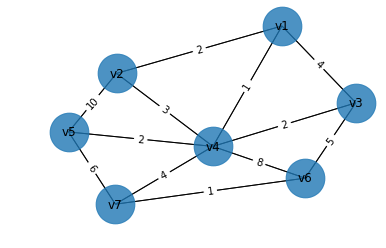

In [50]:
graph_test = Graph(with_default=1, with_arrow=False)
graph_test.graph_plot()

In [51]:
djkstra = Djkstra(graph_test.graph, start_point_name='v1')
djkstra.djkstra_engine()

In [52]:
djkstra.backtracking_path('v3')
djkstra.adj_dict

v1 到 v3 的最短路径为['v1', 'v4', 'v3'],路径长度为3


{'v1': {'v2': {'weight': 2}, 'v4': {'weight': 1}, 'v3': {'weight': 4}},
 'v2': {'v1': {'weight': 2}, 'v4': {'weight': 3}, 'v5': {'weight': 10}},
 'v4': {'v1': {'weight': 1},
  'v2': {'weight': 3},
  'v3': {'weight': 2},
  'v5': {'weight': 2},
  'v6': {'weight': 8},
  'v7': {'weight': 4}},
 'v5': {'v2': {'weight': 10}, 'v4': {'weight': 2}, 'v7': {'weight': 6}},
 'v3': {'v1': {'weight': 4}, 'v6': {'weight': 5}, 'v4': {'weight': 2}},
 'v6': {'v3': {'weight': 5}, 'v4': {'weight': 8}, 'v7': {'weight': 1}},
 'v7': {'v4': {'weight': 4}, 'v5': {'weight': 6}, 'v6': {'weight': 1}}}